In [253]:
import numpy as np

radius = 100
pixelWidth = 2.25*radius
pixelHeight = pixelWidth
nBins = 1500
nGrid =200
nRandom = nGrid**2

maxE = 1
# maxE = 60 / np.pi # 60 keV divided by the area of a standard circle

def edgepiece(d):
  if (1< d):
    return 0;
  else:
    alfa = np.arccos ( d)
    return alfa - (d*np.sqrt(1-d**2))

def cornerpiece(x,y):
  if (1 < x**2 + y**2):
    return 0
  else:
    alfaX = np.arcsin(y)
    alfaY = np.arccos(x)
    return (0.5 * (alfaY-alfaX)+x*y - 0.5 * x*np.sqrt(1-x**2) - 0.5 * y * np.sqrt(1-y**2))

def cuttoff(x,y):
  corner = cornerpiece(x,y)
  return (corner, edgepiece(x) - corner, edgepiece(y) - corner)

def gatherCutoffs(x,y):
  corner, edgeX, edgeY = cuttoff(x,y)
  result = [np.pi-corner-edgeX-edgeY]

  if (corner > 0):
    result.append(corner)
  if (edgeX > 0):
    result.append(edgeX)
  if (edgeY > 0):
    result.append(edgeY)
  return result

# rescaling of the pixel relative to the crater, so we can use a radius of 1
# simulation over 1 quarter of a pixel, so we only deal with the left and lower edges

simWidth = pixelWidth / radius / 2;
simHeight = pixelHeight / radius / 2;

x_values = np.linspace(0.5*simWidth/nGrid, simWidth*(1-0.5/nGrid), nGrid)
y_values = np.linspace(0.5*simHeight/nGrid, simHeight*(1-0.5/nGrid), nGrid)
#print(x_values)

impacts = []
gridData = []
for x in x_values:
  rowData = []
  for y in y_values:
    rowData.append(gatherCutoffs(x,y)[0])
    impacts.extend(gatherCutoffs(x,y))
  gridData.append(rowData)

impactsRandom = []
for i in range(nRandom):
  x = np.random.uniform(0., simWidth)
  y = np.random.uniform(0., simHeight)
  impactsRandom.extend(gatherCutoffs(x,y))

# rescaling of results to 60 keV

impacts = np.array(impacts) * maxE
impactsRandom = np.array(impactsRandom) * maxE
gridData = np.array(gridData) * maxE

# rescaling to the width and height
x_values *= pixelWidth
y_values *= pixelHeight

#print(len(impacts))
impacts.sort()

In [254]:
impactsRandom = []
for i in range(nRandom):
  x = np.random.uniform(0., simWidth)
  y = np.random.uniform(0., simHeight)
  impactsRandom.extend(gatherCutoffs(x,y))

# rescaling of bins to 60 keV
impacts = np.array(impacts) * maxE
#print(len(impacts))
impacts.sort()



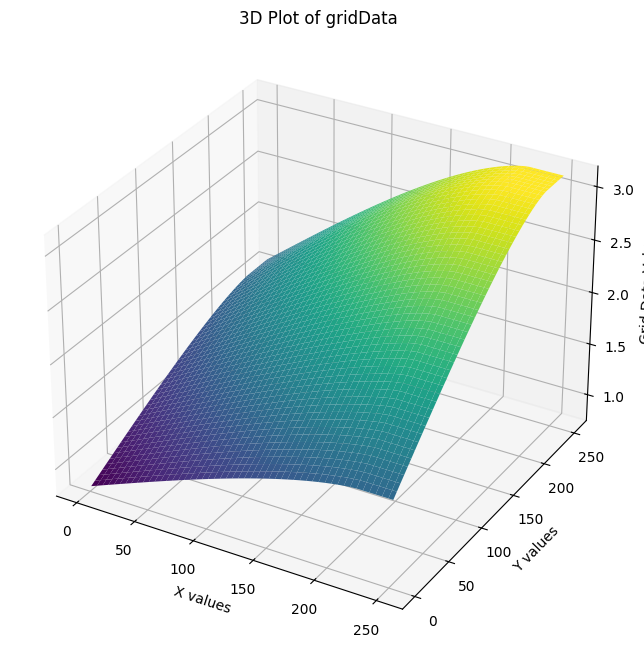

In [255]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Convert gridData to a numpy array for plotting
Z = np.array(gridData)

# Create a meshgrid for the X and Y coordinates
X, Y = np.meshgrid(x_values, y_values)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels
ax.set_xlabel('X values')
ax.set_ylabel('Y values')
ax.set_zlabel('Grid Data Value')
ax.set_title('3D Plot of gridData')

plt.show()

Histogram Counts (bins):
[2634 1195 1003 ...   49   49  575]
136028

Bin Edges ( 1500 bins):


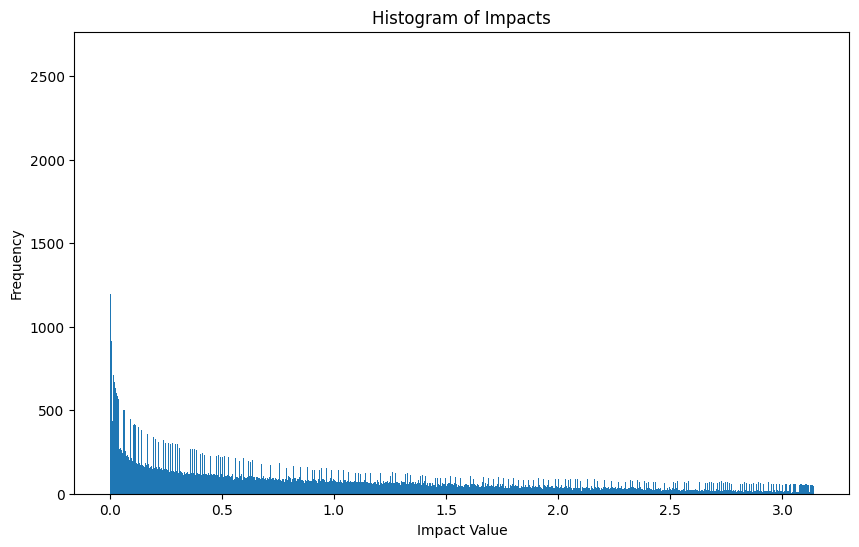

In [256]:
import matplotlib.pyplot as plt

hist_counts, bin_edges = np.histogram(impacts, bins=nBins)
print("Histogram Counts (bins):")
print(hist_counts)
print(sum(hist_counts))
print("\nBin Edges ( "+ str(nBins)+ " bins):")
#print(bin_edges)

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram using the counts and bin edges
ax.hist(bin_edges[:-1], bin_edges, weights=hist_counts)

# Add labels and title
ax.set_xlabel('Impact Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Impacts')

# Display the plot
plt.show()

Histogram Counts (bins):
[20723 10102  7973  6803  5983  5457  4945  4681  4196  4031  3797  3518
  3341  3228  3014  2860  2738  2600  2489  2368  2269  2149  2070  1959
  1875  1781  1741  1607  1539  1493  1427  1303  1331  1219  1209  1146
  1124  1089  1070  1780]
136028

Bin Edges ( 1500 bins):


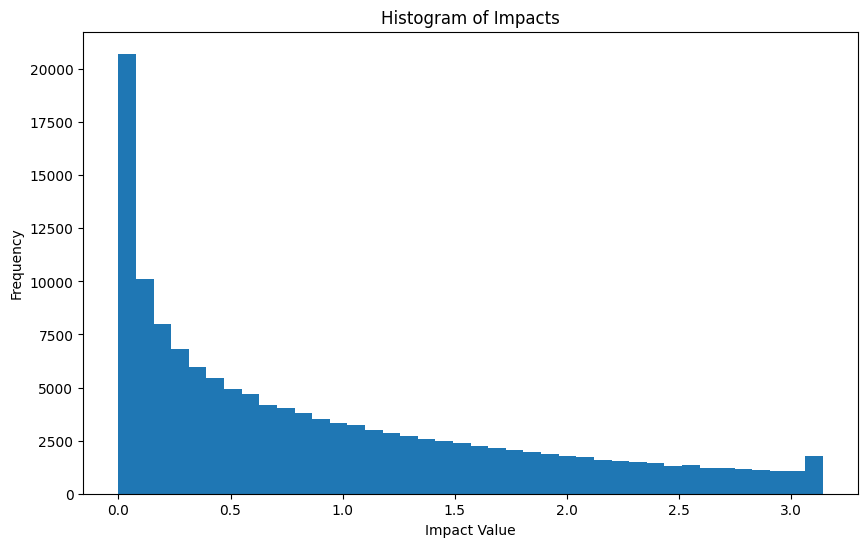

In [257]:
import matplotlib.pyplot as plt

hist_counts, bin_edges = np.histogram(impacts, bins=40)
print("Histogram Counts (bins):")
print(hist_counts)
print(sum(hist_counts))
print("\nBin Edges ( "+ str(nBins)+ " bins):")
#print(bin_edges)

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram using the counts and bin edges
ax.hist(bin_edges[:-1], bin_edges, weights=hist_counts)

# Add labels and title
ax.set_xlabel('Impact Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Impacts')

# Display the plot
plt.show()

Histogram Counts (bins):
[2595 1303 1012 ...   48   45  564]
136029

Bin Edges ( 1500 bins):


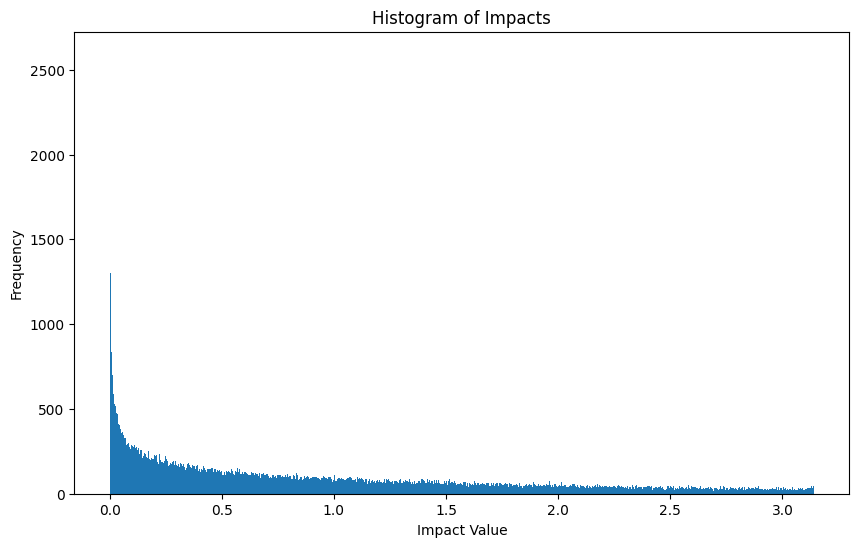

In [258]:

hist_counts_random, bin_edges_random = np.histogram(impactsRandom, bins=nBins)
print("Histogram Counts (bins):")
print(hist_counts_random)
print(sum(hist_counts_random))
print("\nBin Edges ( "+ str(nBins)+ " bins):")
#print(bin_edges)

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram using the counts and bin edges
ax.hist(bin_edges_random[:-1], bin_edges_random, weights=hist_counts_random)

# Add labels and title
ax.set_xlabel('Impact Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Impacts')

# Display the plot
plt.show()

Histogram Counts (bins):
[24276 11942  9221  7957  6852  6222  5679  5211  4736  4498  4208  3811
  3609  3517  3157  2962  2765  2687  2547  2349  2189  2051  1947  1882
  1659  1556  1554  1457  1439  2089]
136029

Bin Edges ( 1500 bins):


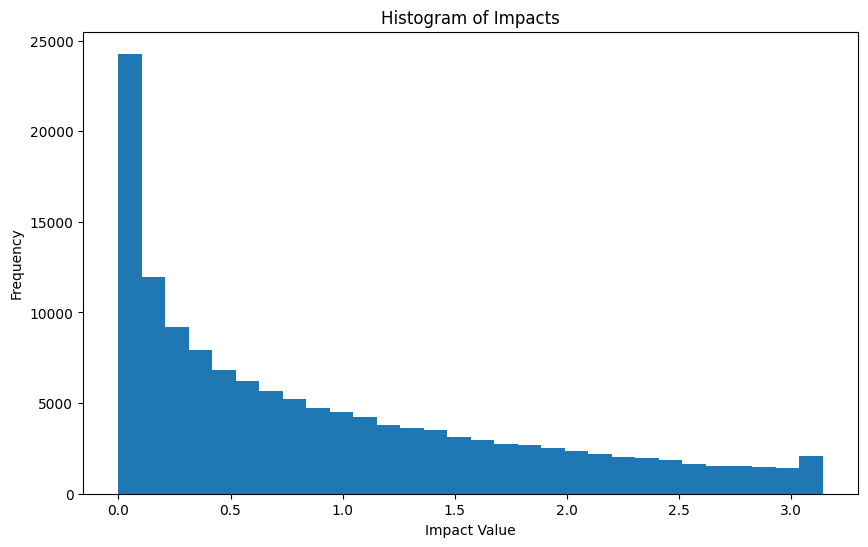

In [259]:

hist_counts_random, bin_edges_random = np.histogram(impactsRandom, bins=30)
print("Histogram Counts (bins):")
print(hist_counts_random)
print(sum(hist_counts_random))
print("\nBin Edges ( "+ str(nBins)+ " bins):")
#print(bin_edges)

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram using the counts and bin edges
ax.hist(bin_edges_random[:-1], bin_edges_random, weights=hist_counts_random)

# Add labels and title
ax.set_xlabel('Impact Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Impacts')

# Display the plot
plt.show()